# k-nearest neighbors (k-NN)
Exploring k-NN algorithm on dataset, using just latitude and longitude data. This algorithm decides the calssification using the k nearest neighbors, either taking the majority classification of those neighbors or weighting their classifciations using their distance.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline

In [2]:
train_file = "WaterPump-training-values.csv"
train_labels = "WaterPump-training-labels.csv"
test_file = "WaterPump-test-values.csv"

df = pd.read_csv(train_file, parse_dates=True,index_col='id') #read into dataframe, parse dates, and set ID as index

In [9]:
labels = pd.read_csv(train_labels, index_col = 'id')

In [3]:
features = ['longitude','latitude']
df = df[features]

In [11]:
#separating dataset into training and testing for cross-validation
test_idx = np.random.uniform(0, 1, len(df)) <= 0.1
train = df[test_idx==True]
trainLabels = labels[test_idx==True]
test = df[test_idx==False]
testLabels = labels[test_idx==False]

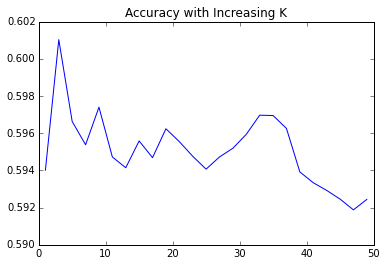

In [18]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], trainLabels['status_group'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==testLabels['status_group'], 1, 0).sum() / float(len(test))
    #print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
 
    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

In [19]:
preds

array(['functional', 'functional', 'functional', ..., 'functional',
       'non functional', 'non functional'], dtype=object)

In [20]:
len(df)

59400